In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing datasets
train_data=pd.read_csv(r"D:\hackathon\train_CloudCondition.csv",header=0,index_col=False)
test_data=pd.read_csv(r"D:\hackathon\test_CloudCondition.csv",header=0,index_col=False)

C:\Users\Mahi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# # Understanding the data structure

In [3]:
train_data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [4]:
test_data.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1029.0,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,Dry,1468
2,80004,rain,18.0,17.0,0.930970,37.0,330,12.0,1045.0,Dry,1152
3,80005,rain,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,Fog,1003
4,80006,rain,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,Fog,1228


In [5]:
train_data.shape

(71428, 12)

In [6]:
test_data.shape

(16452, 11)

In [7]:
train_data.describe()

,Day,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
count,71428.000000,71425.000000,71427.000000,71426.000000,71391.000000,71408.000000,71363.000000,71428.000000
mean,37170.170451,5.550606,0.501020,31.525831,179.221793,8.014606,1022.980606,1249.736546
std,22250.741209,19.093822,0.289431,18.507098,103.729210,4.907893,13.559828,144.828721
min,1.000000,-27.000000,0.000019,0.000000,0.000000,0.000000,1000.000000,1000.000000
25%,18275.750000,-11.000000,0.249233,16.000000,89.000000,4.000000,1011.000000,1124.000000
50%,36132.500000,5.000000,0.501461,31.000000,180.000000,8.000000,1023.000000,1249.000000
75%,53989.250000,22.000000,0.751978,48.000000,269.000000,12.000000,1035.000000,1375.000000
max,80000.000000,38.000000,0.999990,63.000000,359.000000,16.000000,1046.000000,1500.000000


In [8]:
test_data.describe()

,Day,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
count,16452.00000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000
mean,88227.50000,8.950207,5.723444,0.499412,31.497707,179.692135,8.059598,1023.086687,1250.527231
std,4749.42765,17.537058,19.092702,0.287133,18.554079,104.404649,4.916190,13.449947,144.827497
min,80002.00000,-21.000000,-27.000000,0.000138,0.000000,0.000000,0.000000,1000.000000,1000.000000
25%,84114.75000,-6.000000,-11.000000,0.251266,15.000000,89.000000,4.000000,1012.000000,1125.000000
50%,88227.50000,9.000000,6.000000,0.498290,31.000000,181.000000,8.000000,1023.000000,1249.000000
75%,92340.25000,24.000000,22.043056,0.745880,48.000000,271.000000,12.000000,1035.000000,1375.000000
max,96453.00000,39.000000,47.527778,1.000000,63.000000,359.000000,16.100000,1046.000000,1500.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         71428 non-null  int64  
 1   Cloud_Condition             71428 non-null  object 
 2   Rain_OR_SNOW                71313 non-null  object 
 3   Temperature (C)             71176 non-null  object 
 4   Apparent Temperature (C)    71425 non-null  float64
 5   Humidity                    71427 non-null  float64
 6   Wind Speed (km/h)           71426 non-null  float64
 7   Wind Bearing (degrees)      71391 non-null  float64
 8   Visibility (km)             71408 non-null  float64
 9   Pressure (millibars)        71363 non-null  float64
 10  Condensation                71428 non-null  object 
 11  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 6.5+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16452 entries, 0 to 16451
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         16452 non-null  int64  
 1   Rain_OR_SNOW                16452 non-null  object 
 2   Temperature (C)             16452 non-null  float64
 3   Apparent Temperature (C)    16452 non-null  float64
 4   Humidity                    16452 non-null  float64
 5   Wind Speed (km/h)           16452 non-null  float64
 6   Wind Bearing (degrees)      16452 non-null  int64  
 7   Visibility (km)             16452 non-null  float64
 8   Pressure (millibars)        16452 non-null  float64
 9   Condensation                16452 non-null  object 
 10  Solar irradiance intensity  16452 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.4+ MB


# Checking & handling unique + missing values

In [11]:
# checking the unique values 
for i in train_data.columns:
    print({i:train_data[i].unique()})

{'Day': array([    1,     2,     3, ..., 79998, 79999, 80000], dtype=int64)}
{'Cloud_Condition': array(['Partly Cloudy', 'Light Rain', 'Breezy and Dry', 'Overcast',
       'Foggy', 'Breezy and Mostly Cloudy', 'Clear',
       'Breezy and Partly Cloudy', 'Breezy and Overcast',
       'Humid and Mostly Cloudy', 'Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy'], dtype=object)}
{'Rain_OR_SNOW': array(['rain', 'snow', nan], dtype=object)}
{'Temperature (C)': array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '3', '29', '-8', '-15', '-20', '36', '32', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
      

In [12]:
# handling the unique values
train_data.dtypes
train_data=train_data.replace(["-"],np.nan)
train_data.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               253
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [13]:
# checking the unique values 
for i in test_data.columns:
    print({i:test_data[i].unique()})

{'Day': array([80002, 80003, 80004, ..., 96451, 96452, 96453], dtype=int64)}
{'Rain_OR_SNOW': array(['rain', 'snow'], dtype=object)}
{'Temperature (C)': array([  1.        ,  -3.        ,  18.        ,  33.        ,
        25.        ,   8.        ,  17.        ,  13.        ,
       -12.        , -14.        ,   4.        ,  -9.        ,
        26.        ,  -6.        ,  39.        , -11.        ,
        23.        ,  -7.        ,  36.        ,   5.        ,
        15.        , -21.        ,   9.        , -20.        ,
        -8.        ,   6.        ,   7.        , -17.        ,
        -2.        ,  38.        ,  11.        ,  32.        ,
        10.        ,  28.        ,  21.        ,  22.        ,
       -15.        ,  27.        ,  24.        ,   0.        ,
        14.        ,  30.        , -16.        ,  -1.        ,
       -19.        ,  37.        ,  16.        ,   3.        ,
        35.        , -13.        ,  31.        ,  12.        ,
       -10.        ,  -5.   

In [14]:
test_data.isnull().sum()

Day                           0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [15]:
train_data["Temperature (C)"]=train_data["Temperature (C)"].astype("float64")
train_data.dtypes

Day                             int64
Cloud_Condition                object
Rain_OR_SNOW                   object
Temperature (C)               float64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                   object
Solar irradiance intensity      int64
dtype: object

In [16]:
for x in train_data.columns:
    if train_data[x].dtype=="object" or train_data[x].dtype=="bool":
        train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    elif train_data[x].dtype=="int64" or train_data[x].dtype=="float64":
        train_data[x].fillna(train_data[x].mean(),inplace=True)

train_data.isnull().sum()

Day                           0
Cloud_Condition               0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [17]:
train_df=train_data.copy()
df=pd.DataFrame()
df["Cloud_Condition"]=train_df["Cloud_Condition"]

# converting categorical variables into numerical variables

In [18]:
# finding object & storing variables for labelencoding from train_data
colname=[]
for i in train_data.columns:
    if train_data[i].dtype=="object":
        colname.append(i)
print(colname)

['Cloud_Condition', 'Rain_OR_SNOW', 'Condensation']


In [19]:
# converting the object(categorical) variable into numerical variable using label encoder in train_data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

# checking the result of labelencoder
train_data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,19,0,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,2,1068
1,2,19,0,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,2,1291
2,3,19,0,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,0,1433
3,4,19,1,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,0,1410
4,5,19,1,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,1,1391


In [20]:
train_df_new=train_data.copy()

In [21]:
# finding object variables & storing for labelencoding from test_data

colname=[]
for i in test_data.columns:
    if test_data[i].dtype=="object":
        colname.append(i)
print(colname)

['Rain_OR_SNOW', 'Condensation']


In [22]:
# converting the object(categorical) variable into numerical variable using label encoder in test_data

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

# checking the result of labelencoder
test_data.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,0,1.0,0.0,0.078150,17.0,300,10.0,1029.0,1,1399
1,80003,0,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,0,1468
2,80004,0,18.0,17.0,0.930970,37.0,330,12.0,1045.0,0,1152
3,80005,0,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,1,1003
4,80006,0,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,1,1228


In [23]:
# splitting the data into X with all independent variables & Y with dependent variable

In [24]:
# Splitting the data into x_train and Y_train
X=train_data.drop(["Cloud_Condition"],axis=1)
Y=train_data["Cloud_Condition"]

array([[<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Rain_OR_SNOW'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>],
       [<AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>],
       [<AxesSubplot:title={'center':'Condensation'}>,
        <AxesSubplot:title={'center':'Solar irradiance intensity'}>,
        <AxesSubplot:>]], dtype=object)

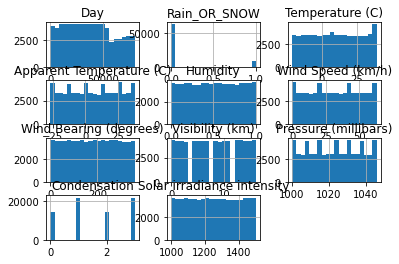

In [25]:
X.hist(bins=20)

C:\Users\Mahi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Density'>

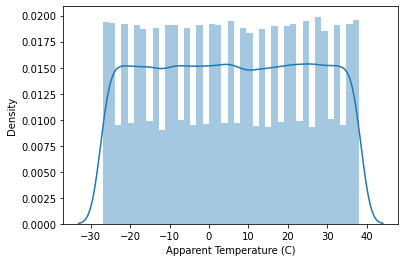

In [26]:
sns.distplot(X["Apparent Temperature (C)"],hist=True)
    


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

print(X)

[[-1.67048056e+00 -3.79619676e-01 -1.24805996e+00 ... -1.10528924e+00
   3.49339568e-01 -1.25484653e+00]
 [-1.67043562e+00 -3.79619676e-01  3.43093135e-01 ...  9.60588356e-01
   3.49339568e-01  2.84914088e-01]
 [-1.67039067e+00 -3.79619676e-01  1.36597727e+00 ... -1.40041461e+00
  -1.44639478e+00  1.26538946e+00]
 ...
 [ 1.92479563e+00 -3.79619676e-01  1.08184279e+00 ...  6.65462985e-01
   3.49339568e-01  1.47253214e+00]
 [ 1.92484057e+00 -3.79619676e-01 -1.41854065e+00 ... -2.93694470e-01
  -5.48527608e-01  8.72384249e-03]
 [ 1.92488551e+00 -3.79619676e-01 -1.36171375e+00 ...  1.43090086e-03
  -5.48527608e-01  5.70571354e-02]]


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10,random_state=10)

In [29]:
# creating the decision tree model
from sklearn.tree import DecisionTreeClassifier

model_decision_tree=DecisionTreeClassifier(criterion="gini",random_state=10)

# fit the model by passing the training data

model_decision_tree.fit(X_train,Y_train)

# predicting the values
Y_pred=model_decision_tree.predict(X_test)


In [30]:
# testing & predicting the model
Y_pred=model_decision_tree.predict(X_test)
print(Y_pred)

[17 12 19 ... 18 18 17]


In [31]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
cfm
print(accuracy_score(Y_test,Y_pred))

print(classification_report(Y_test,Y_pred))

0.5867282654346913
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.57      0.51      0.54        74
           2       0.20      1.00      0.33         1
           3       0.21      0.23      0.22        48
           4       0.28      0.33      0.30        42
           5       0.19      0.24      0.21        34
           6       0.54      0.56      0.55       956
           9       0.33      0.25      0.29         4
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         9
          12       0.65      0.65      0.65       579
          13       0.00      0.00      0.00         4
          15       0.50      0.50      0.50         2
          16       0.67      0.91      0.77        22
          17       0.60      0.59      0.59      2216
          18       0.59      0.59      0.59      1356
          19       0.61      0.61      0.61      1783
        

C:\Users\Mahi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print(list(zip(train_data.columns,model_decision_tree.feature_importances_)))

[('Day', 0.5858130501566681), ('Cloud_Condition', 0.019477743483266863), ('Rain_OR_SNOW', 0.04819306771533227), ('Temperature (C)', 0.04568550315323221), ('Apparent Temperature (C)', 0.051934446936475503), ('Humidity', 0.04614934384988493), ('Wind Speed (km/h)', 0.05119683162145306), ('Wind Bearing (degrees)', 0.036651952729448815), ('Visibility (km)', 0.044864644660204844), ('Pressure (millibars)', 0.01785497561876396), ('Condensation', 0.05217844007526951)]


In [33]:
# evaluation of model
#print(classifier.intercept_)
#print(classifier.coef_)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(Y_test,Y_pred))

print(accuracy_score(Y_test,Y_pred))

print(classification_report(Y_test,Y_pred)) 


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0   38    0    0    1    0    9    0    0    0    0    0    0    5
     0   15    6    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   11    5    0    0    0    0    0    0    0    0    0
    16    9    5    0    0    1    1    0]
 [   0    0    0    2   14    1    0    0    0    0    1    0    0    0
     5   16    2    0    0    0    1    0]
 [   1    0    0    4    0    8    4    0    0    0    0    0    0    0
     9    1    6    0    0    0    0    1]
 [   1    3    0    2    1    2  539    2    0    2   31    0    0    5
   112   29  227    0    0    0    0    0]
 [   0    0    0    0    0    0    2    1    0    1    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  

In [34]:
df["Cloud_condition_new"]=train_df_new["Cloud_Condition"]

In [35]:
df.head()

,Cloud_Condition,Cloud_condition_new
0,Partly Cloudy,19
1,Partly Cloudy,19
2,Partly Cloudy,19
3,Partly Cloudy,19
4,Partly Cloudy,19


In [36]:
df["Cloud_Condition"].unique()

array(['Partly Cloudy', 'Light Rain', 'Breezy and Dry', 'Overcast',
       'Foggy', 'Breezy and Mostly Cloudy', 'Clear',
       'Breezy and Partly Cloudy', 'Breezy and Overcast',
       'Humid and Mostly Cloudy', 'Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy'], dtype=object)

In [37]:
df["Cloud_condition_new"].unique()

array([19, 16,  1, 18, 12,  3,  6,  5,  4, 13, 17, 15, 22, 24,  2, 25,  0,
       11, 23,  7,  9, 20, 14,  8, 21, 10])